In [1]:
import geopandas as gpd
import pandas as pd

/home/feromes/miniconda3/envs/geo/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf_tipos = gpd.read_file('resultados/tipologia_por_distrito.gpkg')

In [3]:
# Adiciona uma coluna com os totais
gdf_tipos['qt_total'] = gdf_tipos[map(str, list(range(10)))].sum(axis=1)

In [4]:
# Converte o total absoluto por uma proporção do total
gdf_tipos.loc[:, map(str, list(range(10)))] = gdf_tipos[map(str, list(range(10)))].apply(lambda x: x/gdf_tipos.qt_total * 100)

In [5]:
# Percentual Máximo por cada tipo
tipo_max_percent = gdf_tipos.loc[:, map(str, list(range(10)))].max(axis=0)#.sort_values(ascending=False)
# ID do percentual Máximo
tipo_max_percent_id = gdf_tipos.loc[:, map(str, list(range(10)))].idxmax(axis=0)
tipo_max_percent.rename("percentual").reset_index().rename(columns={'index':'tipo'})

,tipo,percentual
0,0,59.947028
1,1,68.462830
2,2,58.461810
3,3,69.227600
4,4,95.336577
5,5,57.633814
6,6,20.567885
7,7,86.480126
8,8,37.606157
9,9,44.754768


In [6]:
rank_tipo = pd.concat([tipo_max_percent.rename("percentual"), tipo_max_percent_id.rename("id")], axis=1).reset_index().rename(columns={'index':'tipo'}).set_index("id", drop=False)
rank_tipo

,tipo,percentual,id
id,,,
68,0,59.947028,68
39,1,68.462830,39
81,2,58.461810,81
49,3,69.227600,49
57,4,95.336577,57
46,5,57.633814,46
10,6,20.567885,10
34,7,86.480126,34
19,8,37.606157,19


In [7]:
predonimancia_distrito = rank_tipo.merge(gdf_tipos, how="left", left_index=True, right_index=True).loc[:, ["percentual", "tipo", "ds_codigo", "ds_nome", "geometry"]].sort_values("percentual", ascending=False)
predonimancia_distrito

,percentual,tipo,ds_codigo,ds_nome,geometry
id,,,,,
57,95.336577,4,45,JARDIM PAULISTA,"POLYGON ((329605.461 7390837.489, 329600.764 7..."
34,86.480126,7,49,LIBERDADE,"POLYGON ((332502.702 7392061.729, 332502.811 7..."
49,69.227600,3,54,MORUMBI,"POLYGON ((326414.868 7392091.012, 326416.080 7..."
39,68.462830,1,8,BELEM,"POLYGON ((336956.857 7397163.748, 336962.822 7..."
68,59.947028,0,25,CIDADE TIRADENTES,"POLYGON ((358812.081 7392560.893, 358812.606 7..."
81,58.461810,2,81,TREMEMBE,"POLYGON ((337037.395 7403901.769, 337033.929 7..."
46,57.633814,5,33,IGUATEMI,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
94,44.754768,9,47,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."
19,37.606157,8,31,GUAIANASES,"POLYGON ((355108.237 7393291.184, 355107.277 7..."


<AxesSubplot:>

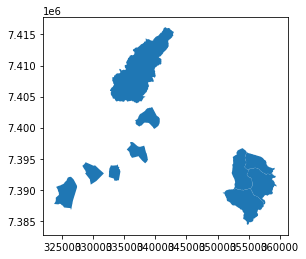

In [8]:
gpd.GeoDataFrame(data=predonimancia_distrito).plot()

In [9]:
gdf_tipos.loc[:, ["6"]].sort_values("6", ascending=False)

,6
10,20.567885
71,17.495717
72,15.157395
9,13.663505
38,13.409132
...,...
54,0.183486
75,0.162734
56,0.118554
57,0.040552


In [10]:
gdf_tipos.loc[:, ["8"]].sort_values("8", ascending=False)

,8
19,37.606157
95,32.053041
44,31.583254
45,30.973585
11,30.150021
...,...
57,0.000000
33,0.000000
66,0.000000
75,0.000000


In [11]:
gdf_tipos.loc[:, ["ds_codigo","9"]].sort_values("9", ascending=False)

,ds_codigo,9
94,47,44.754768
65,30,42.196484
60,83,40.215143
67,55,39.192626
93,57,30.489478
...,...,...
27,66,0.000000
28,69,0.000000
29,78,0.000000
30,7,0.000000
